### This is a short tutorial to get you familiar with accessing Gaia data with astroquery

In [8]:
from astroquery.gaia import Gaia
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

Let's say I want to query in a rectagular region around Pleiades, and retrieve the brightest stars closer than 1000 parsecs corresponding to parallax > 1 mas). 

In SQL queries, Gaia needs RA and Dec in degrees (as far as I know), but usual places define it in hours-minutes-seconds, and degree-minutes-seconds. We can either convert it with astropy, or use string to float conversion. For astropy, look up the syntax/uses of SkyCoord. I'll use the string method here.

In [5]:
s = '03 46 24.2 +24 06 50'
c = [float(i) for i in s.split()]
ra = c[0]*15 + c[1]/4 + c[2]/240
if c[3] >= 0:
    dec = c[3] + c[4]/60 + c[5]/3600
else:
    dec = c[3] - c[4]/60 - c[5]/3600
    
print(ra - 0.6, ra + 0.6)
print(dec - 0.6, dec + 0.6)

56.00083333333333 57.200833333333335
23.51388888888889 24.713888888888892


The four basic parts of ADQL queries were discussed yesterday - feel free to ask doubts if you didn't understand. The IS NOT NULL ensures that the column value is not empty for that particular source.  
We use these values and define our query inside a string, then pass that string into the Gaia interface as illustrated below:

In [6]:
query = '''
SELECT top 10000
ra, dec, parallax, phot_g_mean_mag, pm
FROM gaiadr3.gaia_source
WHERE ra > 56 AND ra < 57.2
AND dec > 23.51 AND dec < 24.71
AND parallax IS NOT NULL
AND parallax > 1
ORDER BY phot_g_mean_mag
'''

job = Gaia.launch_job_async(query)
r = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Let's try to find the distance to the cluster. Cluster stars will form an overdensity at a particular distance

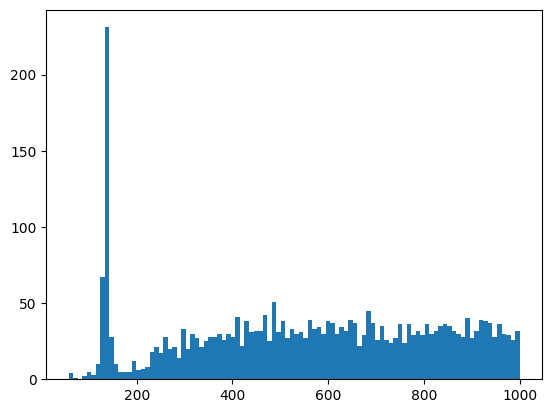

In [11]:
plt.hist(1000/r['parallax'], bins  = 100)
plt.show()

There's a clear overdensity somewhere around 150 parsecs. Let's filter only those stars using a mask

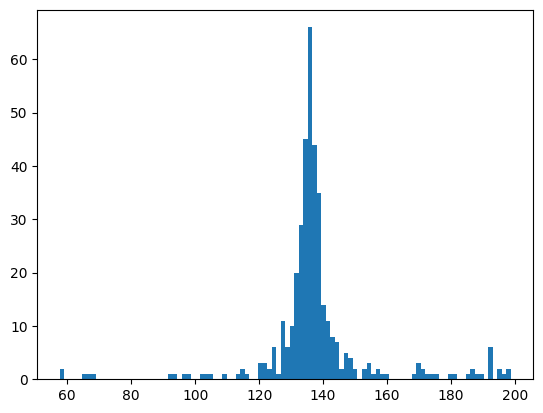

In [13]:
mask = r['parallax'] > 5  #so distance < 200 parsecs
r1 = r[mask]

plt.hist(1000/r1['parallax'], bins = 100)
plt.show()

I'll stop here, but you can look up np.histogram() to find out ways to get the exact distance from above. 

Study and implement quality cuts (error bounds etc.) from the other tutorial, then try out the following:

1. Query for the brightest stars, and study their distribution in galactic coordinates (look up matplotlib pyplot methods to do it!)
2. Query for the closest stars
3. Query for more open and globular clusters, study their distribution of pmra and pmdec (proper motions in RA and Dec)
4. Query around the galactic centre, and look for possible clumps in pmra-pmdec space.
5. Look up the other tables in Gaia datamodel, and list some ways to use that data with our usual astrometric data.

Remember to toy around with different quality cuts. DO NOT hesitate to experiment with different properties, and most importantly, have fun! Ping us on Slack in case of any doubts.